In [30]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from rankeval.analysis.topological import topological_analysis
from rankeval.core.model import RTEnsemble

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model_file = "/Users/claudio/docs/LAVORO/coding/ltr/QuickScorer/debug_data/model.lmart.msn1.xml"
model = RTEnsemble(model_file, name="lmart.100T")

In [3]:
model_stats = topological_analysis(model, include_leaves=False)

[0 1 3 ..., 0 0 0]


In [4]:
model_stats.describe_height_trees()

DescribeResult(nobs=100, minmax=(5, 9), mean=8.5099999999999998, variance=0.83828282828282807, skewness=-1.8152708328151126, kurtosis=2.4112297576244286)

In [5]:
model_stats.fullness_per_level()

array([ 1.        ,  0.53      ,  0.2625    ,  0.226     ,  0.13875   ,
        0.08916667,  0.05263158,  0.03863636,  0.0292    ])

In [27]:
node_freqs = model_stats.fraction_of_trees_per_node()

In [28]:
node_freqs[0,0]

1.0

In [128]:
node_freqs[1,0], node_freqs[1,1]
print node_freqs.shape
print 2**9

(9, 129)
512


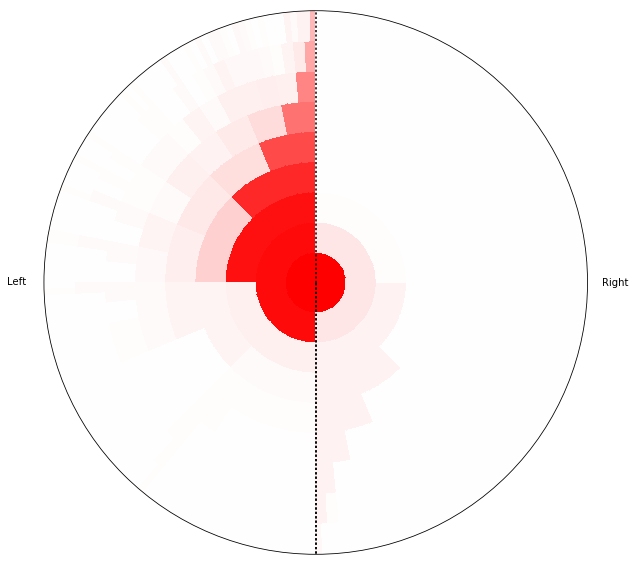

In [197]:
max_levels, _ = node_freqs.shape
max_nodes = 2**max_levels

fig, ax = plt.subplots(ncols=1, subplot_kw=dict(projection='polar'), figsize=(10,10))

theta, r = np.mgrid[0:2*np.pi:(max_nodes+1)*1j, 0:1:(max_levels+1)*1j]
z = np.zeros(theta.size).reshape(theta.shape)

for level in xrange(max_levels):
    num_nodes = 2**level
    num_same_color = max_nodes/num_nodes

    for node in xrange(num_nodes):
        if node<node_freqs.shape[1]:
            z[ num_same_color*node:num_same_color*(node+1), level ] = node_freqs[level, node]

ax.set_theta_zero_location("N")
ax.pcolormesh(theta, r, z, cmap='bwr', vmin=-1., vmax=1.)

ax.plot( [np.pi,np.pi], [0,1], 'k:')
#ax.plot( np.arange(0,np.pi,np.pi/512), [1]*512, 'k-')
ax.plot( [0,0], [0,1], 'k:')
ax.plot( [np.pi,np.pi], [0,1], 'k:')

#ax.spines['polar'].set_visible(False)
#ax.set_xticks([0,2*np.pi])
#ax.set_xticklabels(['Left   ', '    Right'])
ax.set_xticks([np.pi/2.,np.pi*3./2.])
ax.set_xticklabels(['Left', 'Right'])
ax.set_yticklabels([])
ax.set_ylim([0, 1])

plt.show()